In [1]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from sklearn.metrics import accuracy_score, cohen_kappa_score
import scanpy
import scyan

Global seed set to 0


# Data Import

In [2]:
adata, marker_pop_matrix = scyan.data.load("aml")

# Maximizing Likelihood

In [4]:
model = scyan.Scyan(adata, marker_pop_matrix)

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /var/folders/rl/nsddz37s55zbfg5h7b060rlc0000gn/T/tmpxejaoeqr
INFO:torch.distributed.nn.jit.instantiator:Writing /var/folders/rl/nsddz37s55zbfg5h7b060rlc0000gn/T/tmpxejaoeqr/_remote_module_non_scriptable.py
INFO:scyan.model:Initialized Scyan model with N=104184 cells, P=14 populations and M=32 markers. No covariate provided.


In [5]:
model.fit()

INFO:scyan.model:Training scyan with the following hyperparameters:
"alpha_batch_effect": 200.0
"batch_key":          None
"batch_ref":          None
"batch_size":         16384
"hidden_size":        16
"lr":                 0.001
"max_samples":        200000
"mmd_max_samples":    2048
"modulo_temp":        2
"n_hidden_layers":    7
"n_layers":           7
"prior_std":          0.2
"temperature":        1.0

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type        | Params
---------------------------------------
0 | module | ScyanModule | 33.4 K
---------------------------------------
33.4 K    Trainable params
0         Non-trainable params
33.4 K    Total params
0.133     Total estimated model params size (MB)
/Users/quentinblampey/Library/Caches/pypoetry/virtualenvs/scyan-5lsXrWE1-py3.9/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:

Training: 0it [00:00, ?it/s]

Scyan model with N=104184 cells, P=14 populations and M=32 markers. No covariate provided.

# Predictions and model evaluation

In [7]:
model.predict()

print(f"\nModel accuracy: {accuracy_score(model.adata.obs.cell_type, model.adata.obs.scyan_pop):.4f}")
print(f"Model Cohen's kappa: {cohen_kappa_score(model.adata.obs.cell_type, model.adata.obs.scyan_pop):.4f}")


Model accuracy: 0.9883
Model Cohen's kappa: 0.9858


# Results

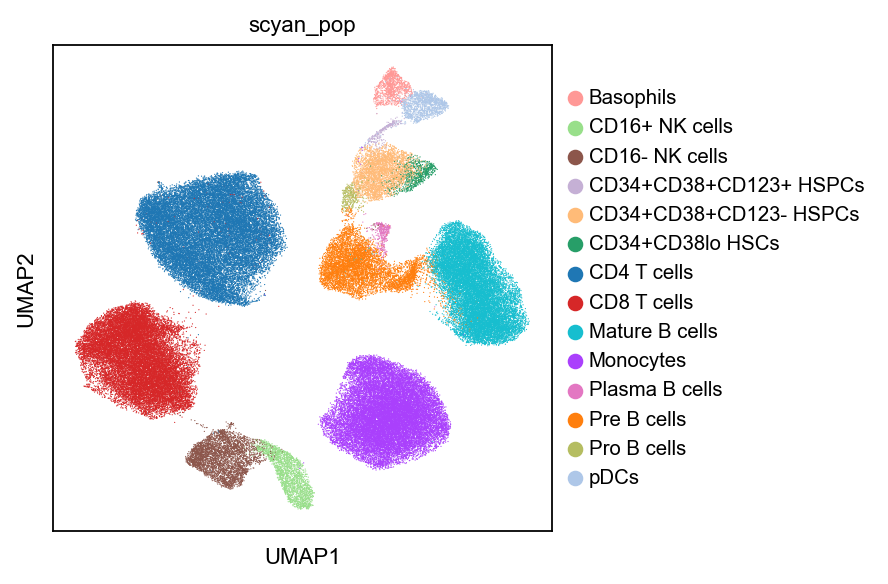

In [9]:
sc.pl.umap(model.adata, color="scyan_pop", palette=adata.uns["palette"])